# Seattle Bike Traffic Prediction

This project utilizes linear regression in Python to predict bike traffic in Seattle. By analyzing historical bike traffic data, the linear regression model aims to identify patterns and trends, providing insights into factors influencing bike ridership. The implementation leverages the scikit-learn library for machine learning and data preprocessing, offering a straightforward yet powerful tool for predicting bike traffic based on various features. 

### Import Libraries

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

### Reading dataset

In [4]:
df = pd.read_csv('seattle_bike_data.csv', index_col=0, parse_dates=True)
df.head(5)

C:\Users\eltig\AppData\Local\Temp\ipykernel_12384\341819338.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('seattle_bike_data.csv', index_col=0, parse_dates=True)


,Date,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
0,2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1,0.000000
1,2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1,0.002740
2,2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1,0.005479
3,2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1,0.008219
4,2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1,0.010959


### EDA

In [5]:
df.dtypes

Date                object
TotalBikesCount    float64
Mon                  int64
Tue                  int64
Wed                  int64
Thu                  int64
Fri                  int64
Sat                  int64
Sun                  int64
holiday              int64
DayLightHrs        float64
AvgTempInC         float64
PRCP_IN            float64
DryDay               int64
YearsCount         float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date               datetime64[ns]
TotalBikesCount           float64
Mon                         int64
Tue                         int64
Wed                         int64
Thu                         int64
Fri                         int64
Sat                         int64
Sun                         int64
holiday                     int64
DayLightHrs               float64
AvgTempInC                float64
PRCP_IN                   float64
DryDay                      int64
YearsCount                float64
dtype: object

In [7]:
df

,Date,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
0,2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1,0.000000
1,2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1,0.002740
2,2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1,0.005479
3,2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1,0.008219
4,2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,2018-06-26,4771.0,0,1,0,0,0,0,0,0,15.769483,6.30,0.0,1,5.731507
2093,2018-06-27,4942.0,0,0,1,0,0,0,0,0,15.763178,6.05,0.0,1,5.734247
2094,2018-06-28,4387.0,0,0,0,1,0,0,0,0,15.755520,6.10,0.0,1,5.736986
2095,2018-06-29,4919.0,0,0,0,0,1,0,0,0,15.746518,6.35,0.0,1,5.739726


### Setting Date as index

In [8]:
df = df.set_index('Date')
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1,0.000000
2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1,0.002740
2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1,0.005479
2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1,0.008219
2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1,0.010959


In [9]:
df.shape

(2097, 14)

In [10]:
df.columns

Index(['TotalBikesCount', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
       'holiday', 'DayLightHrs', 'AvgTempInC', 'PRCP_IN', 'DryDay',
       'YearsCount'],
      dtype='object')

### Splitting data into X and y

In [11]:
indep_cols = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
       'holiday', 'DayLightHrs', 'AvgTempInC', 'PRCP_IN', 'DryDay','YearsCount']
X = df[indep_cols]
y = df['TotalBikesCount']
X.shape, y.shape

((2097, 13), (2097,))

### Creating Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

C:\Users\eltig\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\eltig\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\eltig\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\eltig\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed

LinearRegression(fit_intercept=False)

In [13]:
predictions = model.predict(X)
predictions

C:\Users\eltig\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\eltig\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\eltig\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([3509.10208841, 3375.37680672, 3171.1559462 , ..., 4294.78165878,
       4075.72089562, 2626.74466652])

In [14]:
df1= df[['TotalBikesCount']].copy()
df1['Predictions'] = predictions
df1.head(5)

,TotalBikesCount,Predictions
Date,,
2012-10-03,3521.0,3509.102088
2012-10-04,3475.0,3375.376807
2012-10-05,3148.0,3171.155946
2012-10-06,2006.0,1859.059961
2012-10-07,2142.0,1776.258124


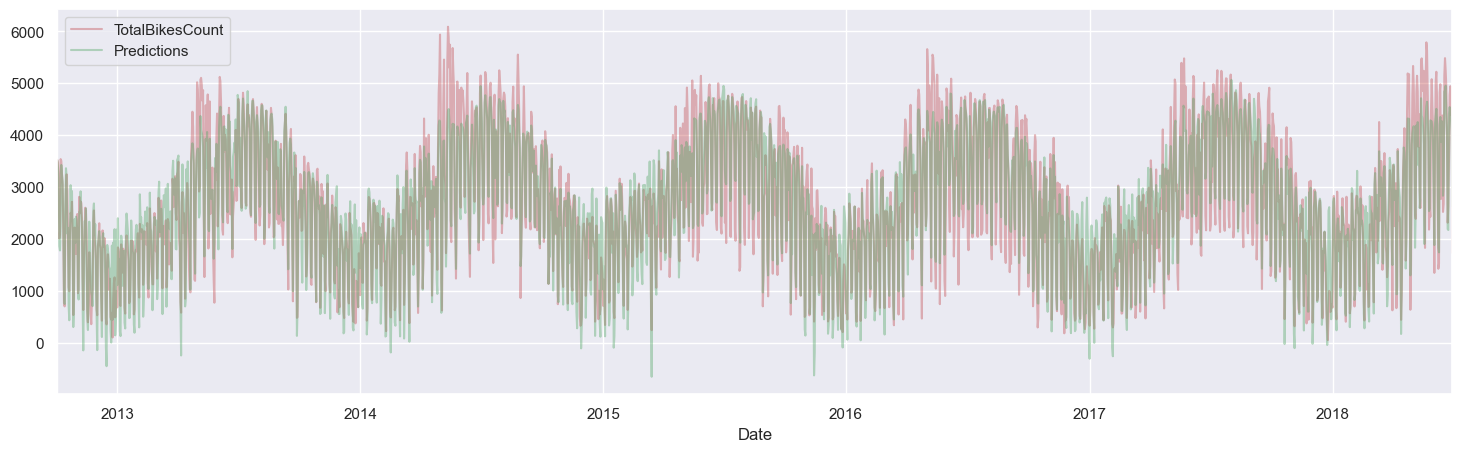

In [15]:
import datetime as dt
df1.plot(alpha=0.4, figsize=(18,5), color=['r','g'])
plt.legend(loc='upper left')
plt.show()

In [16]:
model.coef_

array([-6.54065823e+02, -5.26114967e+02, -5.40396337e+02, -6.88055804e+02,
       -1.00778818e+03, -2.35415766e+03, -2.43062192e+03, -1.20007497e+03,
        1.11462695e+02,  4.06258710e+02, -1.75737653e+05,  5.17444792e+02,
        4.02758119e+01])

In [18]:
coeffs = pd.Series(model.coef_, index=X.columns)
coeffs

Mon              -654.065823
Tue              -526.114967
Wed              -540.396337
Thu              -688.055804
Fri             -1007.788184
Sat             -2354.157663
Sun             -2430.621920
holiday         -1200.074973
DayLightHrs       111.462695
AvgTempInC        406.258710
PRCP_IN       -175737.652995
DryDay            517.444792
YearsCount         40.275812
dtype: float64